Интерполяция

Задание: реализовать примеры

Пример 1

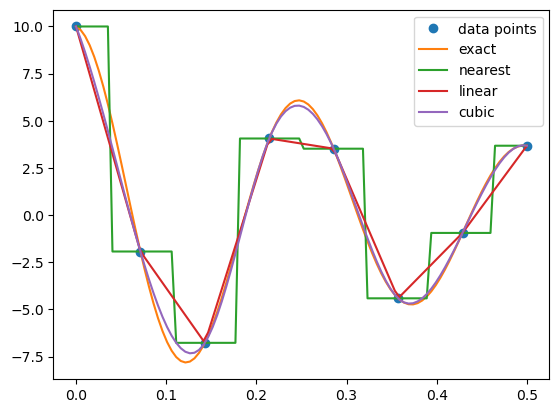

In [1]:
# eg8-interp1d.py
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
A, nu, k = 10, 4, 2
def f(x, A, nu, k):
    return A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)
xmax, nx = 0.5, 8
x = np.linspace(0, xmax, nx)
y = f(x, A, nu, k)
f_nearest = interp1d(x, y, kind='nearest')
f_linear = interp1d(x, y)
f_cubic = interp1d(x, y, kind='cubic')
x2 = np.linspace(0, xmax, 100)
plt.plot(x, y, 'o', label='data points')
plt.plot(x2, f(x2, A, nu, k), label='exact')
plt.plot(x2, f_nearest(x2), label='nearest')
plt.plot(x2, f_linear(x2), label='linear')
plt.plot(x2, f_cubic(x2), label='cubic')
plt.legend()
plt.show()

Пример 2

C:\Users\Gladipen\AppData\Local\Temp\ipykernel_14312\1014370000.py:12: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(x, y, Z, kind='cubic')
C:\Users\Gladipen\AppData\Local\Temp\ipykernel_14312\1014370000.py:13: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
F

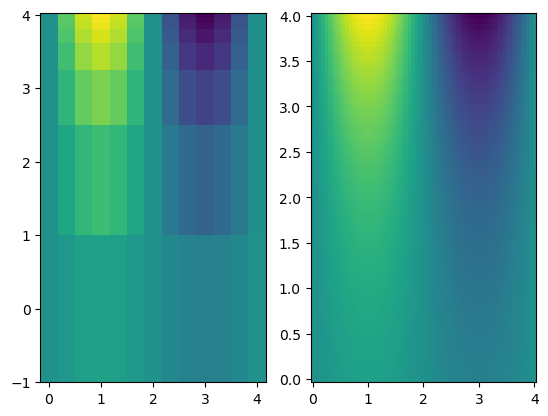

In [2]:
# eg8-interp2d.py
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 13)
y = np.array([0, 2, 3, 3.5, 3.75, 3.875, 3.9375, 4])
X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi*X/2) * np.exp(Y/2)
x2 = np.linspace(0, 4, 65)
y2 = np.linspace(0, 4, 65)
f = interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(X, Y, Z)
X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2)
plt.show()


Пример 3

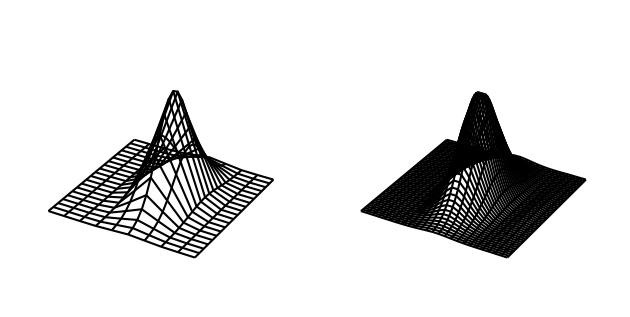

In [3]:
# eg8-RectBivariateSpline.py
import numpy as np
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Равномерная сетка с укрупненным шагом.
dx, dy = 0.4, 0.4
xmax, ymax = 2, 4
x = np.arange(-xmax, xmax, dx)
y = np.arange(-ymax, ymax, dy)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(2*X)**2 - (Y/2)**2)
interp_spline = RectBivariateSpline(y, x, Z)
# Равномерная сетка с более мелким шагом.
dx2, dy2 = 0.16, 0.16
x2 = np.arange(-xmax, xmax, dx2)
y2 = np.arange(-ymax, ymax, dy2)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = interp_spline(y2, x2)
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': '3d'})
ax[0].plot_wireframe(X, Y, Z, color='k')
ax[1].plot_wireframe(X2, Y2, Z2, color='k')
for axes in ax:
    axes.set_zlim(-0.2, 1)
    axes.set_axis_off()
fig.tight_layout()
plt.show()

Пример 4

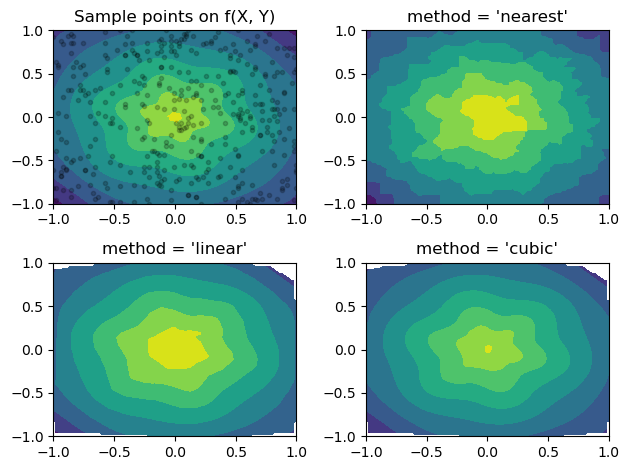

In [4]:
# eg8-gridinterp.py
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s * (1 - s) / 5 * np.sin(6 * phi)
    return 5 * (1 - tau) + tau

T = f(X, Y)
# Выбор npts случайных точек из дискретной области значений моделируемой функции.
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)
fig, ax = plt.subplots(nrows=2, ncols=2)
# Построение графика моделируемой функции и случайно выбранной группы точек.
ax[0, 0].contourf(X, Y, T)
ax[0, 0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0, 0].set_title('Sample points on f(X, Y)')
# Интерполяция с использованием трех различных методик и построение графика.
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px, py), (X, Y), method=method)
    r, c = (i + 1) // 2, (i + 1) % 2
    ax[r, c].contourf(X, Y, Ti)
    ax[r, c].set_title("method = '{}'".format(method))
fig.tight_layout()
plt.show()